In [1]:
# Load all libraries

import xarray as xr
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import gridspec
import matplotlib
import xesmf as xe
import cartopy

# Load TREFHT Data

In [2]:
# Find the TREFHT files in the historical data

files_F_trefht = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_control/f.e11.F1850C5CN.f09_f09.001.cam.h0.TREFHT.*')
print(files_F_trefht)
print(len(files_F_trefht))

['/data/keeling/a/cristi/a/data/LENS/LE_control/f.e11.F1850C5CN.f09_f09.001.cam.h0.TREFHT.180001-189912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/f.e11.F1850C5CN.f09_f09.001.cam.h0.TREFHT.190001-199912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/f.e11.F1850C5CN.f09_f09.001.cam.h0.TREFHT.000101-009912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/f.e11.F1850C5CN.f09_f09.001.cam.h0.TREFHT.010001-019912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/f.e11.F1850C5CN.f09_f09.001.cam.h0.TREFHT.020001-029912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/f.e11.F1850C5CN.f09_f09.001.cam.h0.TREFHT.030001-039912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/f.e11.F1850C5CN.f09_f09.001.cam.h0.TREFHT.040001-049912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/f.e11.F1850C5CN.f09_f09.001.cam.h0.TREFHT.050001-059912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/f.e11.F1850C5CN.f09_f09.001.cam.h0.TREFHT.060001-069912.nc', '/data/keeling/a/cristi/a/d

In [3]:
trefht = xr.open_mfdataset(files_F_trefht,combine="by_coords",use_cftime=True)
trefht.load()

<xarray.Dataset>
Dimensions:       (lev: 30, time: 31200, ilev: 31, lat: 192, lon: 288,
                   slat: 191, slon: 288, nbnd: 2)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 0001-02-01 00:00:00 ... 2601-01-01 00:00:00
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * slat          (slat) float64 -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * slon          (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
Dimensions without coordinates: nbnd
Data variables: (12/32)
    hyam          (time, lev) float64 0.003643 0.007595 0.01436 ... 0.001989 0.0
    hybm          (time, lev) float64 0.0 0.0 0.0 0.0 ... 0.9512 0.9743 0.9926
    hyai          (time, ilev) float64 0.002255 0.005032 0.01016 ... 0.0 0.0
    hybi          (time, ilev) float64 0.0 0.0 0.0 0.0 ... 0.9636 0.9851 1.0
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    date          (time) int32 10201 10301 10401 ... 26001101 26001201 26010101
    ...            ...
    n2ovmr        (time) float64 2.757e-07 2.757e-07 ... 2.757e-07 2.757e-07
    f11vmr        (time) float64 1.248e-11 1.248e-11 ... 1.248e-11 1.248e-11
    f12vmr        (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    sol_tsi       (time) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    nsteph        (time) int32 1488 2832 4320 ... 45549072 45550512 45552000
    TREFHT        (time, lat, lon) float32 239.5 240.2 240.2 ... 234.8 234.8
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             f.e11.F1850C5CN.f09_f09.001
    title:            UNSET
    logname:          mai
    host:             ys1141
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B1850C5CN.f09_g16.005.cam.i.0402-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...

In [4]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)
#new_time_index=pd.date_range(start='1920-02-16',freq='M', periods=1032)

trefht_rein = trefht.TREFHT.interp(lat=new_lats, lon=new_lons)
#historical_newtime = historical_reinterp.assign_coords(time=new_time_index)
trefht_rein

<xarray.DataArray 'TREFHT' (time: 31200, lat: 88, lon: 179)>
array([[[241.30164322, 241.43912043, 240.95056432, ..., 242.32000809,
         242.18315709, 241.8802419 ],
        [242.83365589, 242.58591224, 242.18830532, ..., 243.70157615,
         243.51833937, 243.29021411],
        [245.32132456, 244.81858588, 244.74486109, ..., 246.34900543,
         246.37449188, 246.00203234],
        ...,
        [245.49975983, 245.55728193, 245.58378296, ..., 244.93587697,
         245.18873444, 245.3712815 ],
        [245.40873922, 245.403577  , 245.38882743, ..., 245.30292011,
         245.33678055, 245.36837497],
        [245.2360734 , 245.23679738, 245.2355746 , ..., 245.20815333,
         245.21673787, 245.22195597]],

       [[233.008853  , 232.98036046, 232.70999527, ..., 233.96851878,
         233.77021332, 233.48757024],
        [233.89216953, 233.46533678, 232.9549018 , ..., 235.60750249,
         235.20556217, 234.77244458],
        [236.09526908, 235.62400421, 235.29531877, ..., 237.0072602 ,
         236.93230506, 236.70440915],
...
        [240.50162345, 241.40231227, 242.17171928, ..., 238.17306176,
         238.39353994, 238.94837056],
        [238.65519011, 239.00677092, 239.24542152, ..., 236.98999981,
         237.42244593, 237.85854399],
        [235.66380503, 235.73389165, 235.81386337, ..., 235.43375209,
         235.51051814, 235.55838369]],

       [[241.04952891, 240.5277062 , 240.93099467, ..., 241.47620255,
         241.09375331, 241.29742737],
        [241.42277061, 241.23377253, 241.17454571, ..., 242.53795353,
         242.23459795, 241.98855998],
        [243.32623398, 243.04620251, 242.81806717, ..., 243.99199427,
         243.84633458, 243.83908252],
        ...,
        [238.82093694, 239.3257378 , 239.87981059, ..., 237.10072883,
         237.51815482, 237.94794317],
        [237.21499032, 237.51611065, 237.73323864, ..., 236.11407284,
         236.40056356, 236.65871582],
        [236.43609823, 236.58666911, 236.64444173, ..., 235.95840464,
         236.04169668, 236.1435409 ]]])
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 2601-01-01 00:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

In [5]:
trefht_rein.to_netcdf('/data/keeling/a/mailes2/a/alt_compset_processed/CESM1_F_TREFHT_piControl.nc')

# Load OMEGA 500

In [6]:
# Find the TREFHT files in the historical data

files_F_omega = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_control/f.e11.F1850C5CN.f09_f09.001.cam.h0.OMEGA.*')
print(files_F_omega)
print(len(files_F_omega))

['/data/keeling/a/cristi/a/data/LENS/LE_control/f.e11.F1850C5CN.f09_f09.001.cam.h0.OMEGA.250001-260012.nc']
1


In [7]:
omega_ds = xr.open_mfdataset(files_F_omega, use_cftime=True)
omega_ds

<xarray.Dataset>
Dimensions:       (lev: 30, ilev: 31, time: 1212, lat: 192, lon: 288,
                   slat: 191, slon: 288, nbnd: 2)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 2500-02-01 00:00:00 ... 2601-01-01 00:00:00
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * slat          (slat) float64 -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * slon          (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
Dimensions without coordinates: nbnd
Data variables: (12/32)
    hyam          (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hybm          (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hyai          (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    hybi          (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    P0            float64 ...
    date          (time) int32 dask.array<chunksize=(1212,), meta=np.ndarray>
    ...            ...
    n2ovmr        (time) float64 dask.array<chunksize=(1212,), meta=np.ndarray>
    f11vmr        (time) float64 dask.array<chunksize=(1212,), meta=np.ndarray>
    f12vmr        (time) float64 dask.array<chunksize=(1212,), meta=np.ndarray>
    sol_tsi       (time) float64 dask.array<chunksize=(1212,), meta=np.ndarray>
    nsteph        (time) int32 dask.array<chunksize=(1212,), meta=np.ndarray>
    OMEGA         (time, lev, lat, lon) float32 dask.array<chunksize=(1212, 30, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             f.e11.F1850C5CN.f09_f09.001
    title:            UNSET
    logname:          mai
    host:             ys0106
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B1850C5CN.f09_g16.005.cam.i.0402-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...

In [8]:
# Getting vertical velocity at around 500 mb

omega_500 = omega_ds['OMEGA'].sel(lev=524.687175, method='nearest')

new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)
#new_time_index=pd.date_range(start='1920-02-16',freq='M', periods=1032)

omega_reinterp = omega_500.interp(lat=new_lats, lon=new_lons)

omega_av = omega_reinterp.mean('time')
omega_av

omega_av.load()

<xarray.DataArray 'OMEGA' (lat: 88, lon: 179)>
array([[ 0.01329524,  0.01310421,  0.01288101, ...,  0.01386394,
         0.01374693,  0.01360317],
       [ 0.0172122 ,  0.0173054 ,  0.01734107, ...,  0.01601744,
         0.01642537,  0.01677685],
       [ 0.01121459,  0.01425997,  0.01656212, ...,  0.00942629,
         0.00606851,  0.00608091],
       ...,
       [-0.00459931, -0.00325266, -0.00213658, ..., -0.00437623,
        -0.00606404, -0.00642666],
       [-0.002733  , -0.00269399, -0.00264374, ..., -0.00269023,
        -0.00272801, -0.00274956],
       [-0.00253676, -0.00258174, -0.00262417, ..., -0.00232826,
        -0.00238535, -0.0024424 ]], dtype=float32)
Coordinates:
    lev      float64 524.7
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

# 10 Year TREFHT Variability Plot

In [9]:
trefht_10yr_mean = trefht_rein.rolling(time=120, center=True).mean('time')
trefht_10yr = trefht_10yr_mean.std('time')
trefht_10yr.load()

<xarray.DataArray 'TREFHT' (lat: 88, lon: 179)>
array([[0.21673867, 0.21847006, 0.22236478, ..., 0.2025225 , 0.21221395,
        0.2116692 ],
       [0.21235425, 0.21750436, 0.22808627, ..., 0.20235386, 0.20445466,
        0.2076765 ],
       [0.28767138, 0.28412528, 0.28450917, ..., 0.29926644, 0.2993763 ,
        0.29526641],
       ...,
       [0.37022478, 0.37337247, 0.37590688, ..., 0.34345957, 0.35335618,
        0.36065611],
       [0.3366445 , 0.338601  , 0.34021342, ..., 0.32523796, 0.32881326,
        0.33176245],
       [0.31914225, 0.32107823, 0.32294338, ..., 0.3136684 , 0.31465691,
        0.31594552]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

15752


Text(0, 0.5, '10 yr Local TREFHT $\\sigma$ [K]')

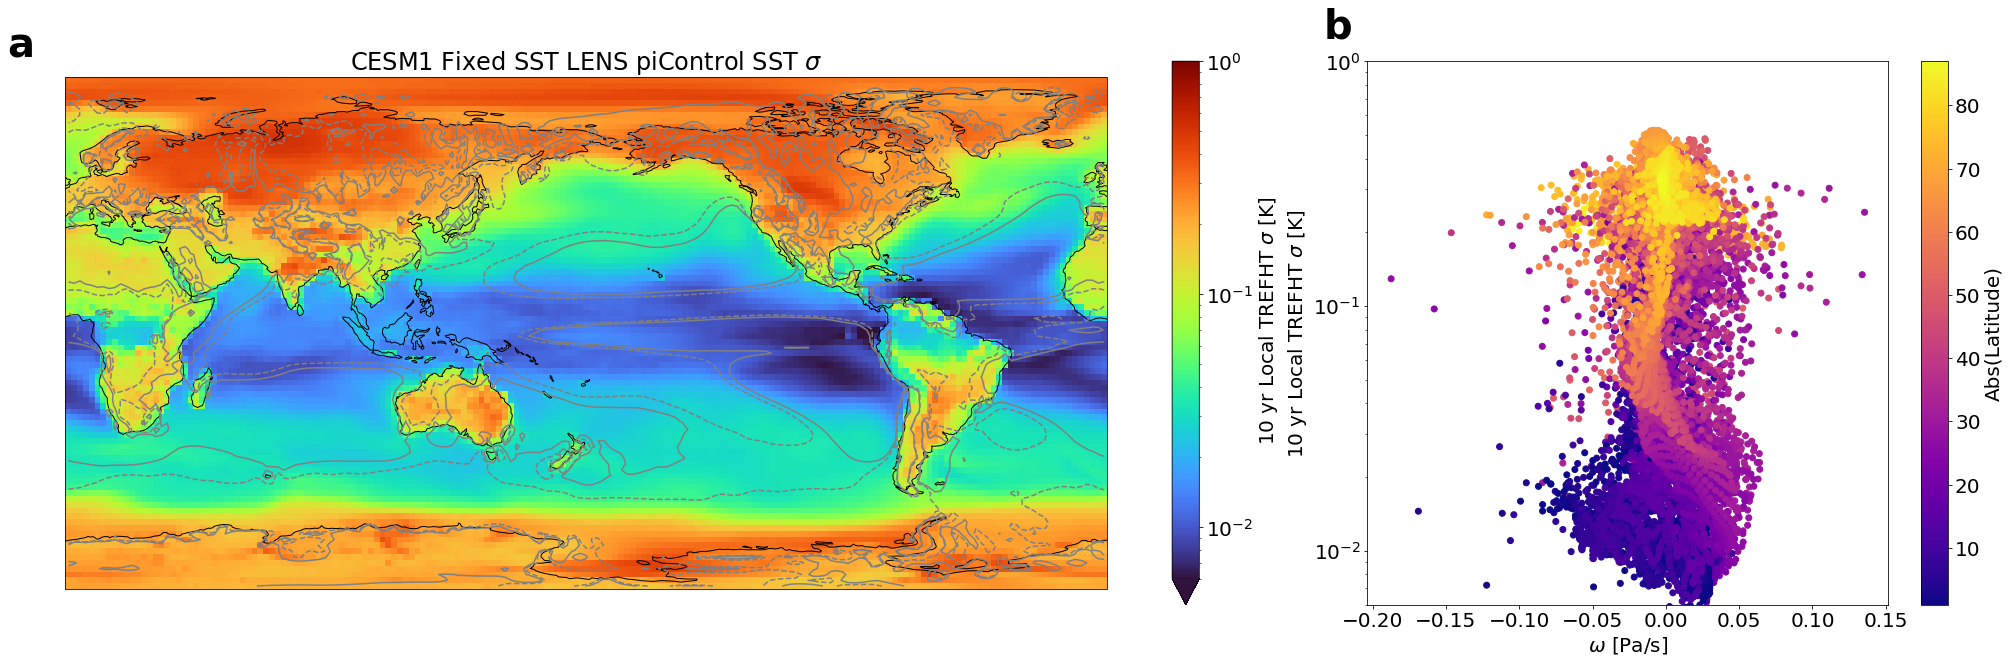

In [15]:
#With contours
fig = plt.figure(figsize=(35, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,1])
gs.update(wspace=0)
#top=300
#bottom=270
font = {'size'   : 20,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

scat_max = 0.5
scat_min = 6*10e-4

colored_lats = []
for latitude in omega_av['lat'].values:
    for i in range(179): #length of longitude
       colored_lats.append(abs(latitude))
print(len(colored_lats))

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree(central_longitude=180))
trefht_10yr.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='turbo', 
                           norm=matplotlib.colors.LogNorm(), vmin=6*10e-4, vmax=1, 
                           cbar_kwargs={'label':r'10 yr Local TREFHT $\sigma$ [K]'})
ax1.coastlines(color='black', linewidth=1)
omega_av.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), 
                                                     colors='#808080', levels=[-0.005,0.005])
ax1.text(-0.03, 1.1, 'a', transform=ax1.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')
plt.title(r'CESM1 Fixed SST LENS piControl SST $\sigma$')

ax2 = fig.add_subplot(gs[1])
scatter_10yr = ax2.scatter(omega_av, trefht_10yr, c=colored_lats, cmap='plasma')
cbar = plt.colorbar(scatter_10yr, ax=ax2)
cbar.ax.set_ylabel('Abs(Latitude)')
plt.ylim(scat_min, 1)
plt.yscale('log')
#plt.title('Control - CESM1')
plt.xlabel(r'$\omega$ [Pa/s]')
ax2.text(-0.03, 1.1, 'b', transform=ax2.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')
plt.ylabel(r'10 yr Local TREFHT $\sigma$ [K]')